<a href="https://colab.research.google.com/github/adammoss/bnn_hmc/blob/main/results/CMD_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
import shutil
import subprocess
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
nruns = 50

In [3]:
!nvidia-smi

Wed Aug 17 08:43:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    43W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!pip install astro-datasets --upgrade
!pip install tensorflow_datasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for astro-datasets: filename=astro_datasets-0.0.10-py3-none-any.whl size=15992 sha256=1f848665f783114806cae573b02c69a2e502709ce0641bec54bd771ef85769c9
  Stored in directory: /root/.cache/pip/wheels/33/b2/9d/97c264f6addbd178fe1c8ff119617e1515cb8c0d0f220605cf
Successfully built astro-datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
shutil.rmtree('bnn_hmc', ignore_errors=True)

In [6]:
!git clone https://github.com/adammoss/bnn_hmc

Cloning into 'bnn_hmc'...
remote: Enumerating objects: 292, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 292 (delta 0), reused 0 (delta 0), pack-reused 288
Receiving objects: 100% (292/292), 697.42 KiB | 11.82 MiB/s, done.
Resolving deltas: 100% (194/194), done.


In [7]:
# https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
!pip install --upgrade https://storage.googleapis.com/jax-releases/cuda111/jaxlib-0.1.65+cuda111-cp37-none-manylinux2010_x86_64.whl
!pip install jax==0.2.12
!pip install dm-haiku==0.0.5.dev0 optax==0.0.6 chex==0.0.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 189.4 MB 16 kB/s 
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.3.14+cuda11.cudnn805
    Uninstalling jaxlib-0.3.14+cuda11.cudnn805:
      Successfully uninstalled jaxlib-0.3.14+cuda11.cudnn805
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 590 kB 5.0 MB/s 
  Created wheel for jax: filename=jax-0.2.12-py3-none-any.whl size=682487 sha256=2e7d97ddbf9a4c2833f4de1f00f260f28ac189da000dd93911334ad51465369e
  Stored in directory: /root/.cache/pip/wheels/f6/4d/e5/73eec5070b77f25664c67bd793d4eb97f41bbf9be7afafd15e
Successfully built jax
  Attempting uninstall: jax
    Found existing installation: jax 0.3.14
    Uninstalling jax-0.3.14:
      Successfully uninstalled jax-0.3.14
Looking in indexes: https://pypi.org/simple, https://us-python.pk

In [8]:
!python3 bnn_hmc/scripts/run_sgd.py --seed=2 --weight_decay=10 --dir=runs/sgd/cmd/lenet/ \
  --dataset_name=cmd --model_name=resnet20_frn_swish --scaling=asinh \
  --init_step_size=3e-7 --num_epochs=100 --eval_freq=5 --batch_size=100 \
  --save_freq=500 --subset_train_to=8300 --patience 50 \
  --builder_kwargs="{'simulation': 'IllustrisTNG', 'field': 'Mtot', 'parameters': ['omegam']}" \
  --train_split='train[:90%]' --test_split='train[90%:95%]' --image_size=64

Streaming output truncated to the last 5000 lines.
Dl Completed...:   0% 0/1 [00:07<?, ? url/s]
Dl Completed...:   0% 0/1 [00:07<?, ? url/s]
Dl Completed...:   0% 0/1 [00:07<?, ? url/s]
Dl Completed...:   0% 0/1 [00:07<?, ? url/s]
Dl Completed...:   0% 0/1 [00:07<?, ? url/s]
Dl Completed...:   0% 0/1 [00:07<?, ? url/s]
Dl Completed...:   0% 0/1 [00:07<?, ? url/s]
Dl Completed...:   0% 0/1 [00:07<?, ? url/s]
Dl Completed...:   0% 0/1 [00:07<?, ? url/s]
Dl Size...:  22% 826/3750 [00:07<00:24, 118.19 MiB/s]
Dl Completed...:   0% 0/1 [00:07<?, ? url/s]
Dl Completed...:   0% 0/1 [00:07<?, ? url/s]
Dl Completed...:   0% 0/1 [00:07<?, ? url/s]
Dl Completed...:   0% 0/1 [00:07<?, ? url/s]
Dl Completed...:   0% 0/1 [00:07<?, ? url/s]
Dl Completed...:   0% 0/1 [00:07<?, ? url/s]
Dl Completed...:   0% 0/1 [00:07<?, ? url/s]
Dl Completed...:   0% 0/1 [00:07<?, ? url/s]
Dl Completed...:   0% 0/1 [00:07<?, ? url/s]
Dl Completed...:   0% 0/1 [00:07<?, ? url/s]
Dl Completed...:   0% 0/1 [00:07<?, ? ur

In [18]:
!python3 bnn_hmc/scripts/run_sgd.py --seed=2 --weight_decay=10 --dir=runs/sgd/cmd/lenet/ \
  --dataset_name=cmd --model_name=resnet20_frn_swish --scaling=asinh \
  --init_step_size=3e-7 --num_epochs=100 --eval_freq=5 --batch_size=100 \
  --save_freq=500 --subset_train_to=8300 --patience 50 \
  --builder_kwargs="{'simulation': 'IllustrisTNG', 'field': 'Mtot', 'parameters': ['omegam']}" \
  --eval_split='train[90%:95%]' --image_size=64

JAX sees the following devices: [GpuDevice(id=0, process_index=0)]
TF sees the following devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
tcmalloc: large alloc 1183137792 bytes == 0x10a78c000 @  0x7f7ff6d24887 0x7f7fe4e297ce 0x7f7fe4e2e2c2 0x7f7fe4e348a2 0x7f7fe4e34e7d 0x7f7fe4e351e9 0x7f7fe4426f11 0x7f7fe442219f 0x7f7fe493dd01 0x7f7fe4441594 0x7f7fe4442126 0x7f7fe3b57a69 0x7f7fe3b514e0 0x7f7fe3b5ba3c 0x7f7fe3b4bba6 0x7f7fe3918fa5 0x7f7fe390e961 0x593784 0x594731 0x548cc1 0x51566f 0x593dd7 0x5118f8 0x549576 0x593fce 0x548ae9 0x51566f 0x598ef4 0x500d94 0x5a7284 0x5a9cf4
Continuing the run from the last saved checkpoint
bnn_hmc/scripts/run_sgd.py:157: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  predict_fn(net_apply, params, net_state, test_s

In [21]:
root = '/content/runs/sgd/cmd/lenet/sgd_mom_0.9__lr_sch_i_3e-07___epochs_100_wd_10.0_batchsize_100_temp_1.0__seed_2'
data = np.load(root + '/test_set.npy')  
prediction = np.load(root + '/predictions.npy')
metrics = np.load(root + '/metrics.npy', allow_pickle=True)

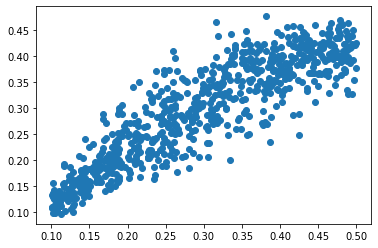

In [22]:
plt.scatter(data[0,:,0], prediction[0,:,0])
plt.show()

In [12]:
metrics

array({'scaled_nll': array(17.038355, dtype=float32), 'scaled_mse': array(3.8658197, dtype=float32), 'scaled_rmse': 1.9661688, 'nll': array(17.038355, dtype=float32), 'mse': array(3.8658197, dtype=float32), 'rmse': 1.9661688},
      dtype=object)